# Zeitbezogene Analysen / Kontinuität / Studiengang 4

Das studentische Verhalten wird nachfolgend hinsichtlich seiner Kontinuität betrachtet.

**Zeitraum der aufgezeichneten Log-Einträge**
Montag, 12.10.2020 bis Donnerstag, 03.06.2021
Länge des Zeitraums: 7 Monate, 3 Wochen, 2 Tage
Länge in Tagen: 235 Tage
Länge in Wochen: 33 Wochen, 4 Tage

**Prüfungszeitraum 1**
Freitag, 22.01.2021 bis Samstag, 06.02.2021
Länge in Tagen: 16 Tage (inkl. Sonntage)

**Prüfungszeitraum 2**
Freitag, 12.03.2021 bis Samstag, 27.03.2021
Länge in Tagen: 16 Tage (inkl. Sonntage)

### Import von Bibliotheken und anderen Erweiterungen

In [127]:
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.core.display_functions import display

### Definitionen zur Darstellung der Visualisierungen

In [128]:
sns.set_theme(style='white', font_scale=1.2, palette='Set2_r')

# Definition von Farblisten (Brewer-Palettes)
colors_set3 = ['#8dd3c7', '#ffffb3', '#bebada', '#fb8072', '#80b1d3', '#fdb462', '#b3de69', '#fccde5', '#d9d9d9', '#bc80bd', '#ccebc5', '#ffed6f']
colors_set2 = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']

# Definition von Farben für die Studiengänge
colors_studies = ['#dac29e', '#e5c94a', '#a2c865', '#da96bf', '#94a3c2']

# Ausgabe der Ergebnistabellen in ungekürzter Form
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Herstellung der Verbindung zur MySQL-Datenbank

In [129]:
user = "root"
password = "root"
host = "localhost"
database = "vfh_moodle_ws20"
port = 3306

engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}', pool_recycle=port)
connection = engine.connect()

### Import der Arbeitsdaten aus der MySQL-Datenbank

In [130]:
# Gegenstand der Untersuchungen sind nur Datensätze von zuvor als Studenten identifizierten Benutzern – unabhängig davon,
# ob diese selbst eine Aktivität initiiert haben oder nur mit einer Aktivität einer anderen Person in Beziehung standen.
query = """SELECT * FROM moodle_data WHERE userstatus = 'student' OR relateduserstatus = 'student'"""
md = pd.read_sql(query, connection) # Definition der Arbeitsdaten

### Vorbereitung der Arbeitsdaten

In [131]:
# Konvertierung des Datentyps des Tabellenmerkmals timecreated
md['timecreated'] = pd.to_datetime(md['timecreated'], unit='s')

# Definition der Menge an Wochen im Untersuchungszeitraum
weeks_in_period_count = md.timecreated.sort_values().dt.strftime('%Y-%U').unique().size

# Definition der Menge an Tagen im Untersuchungszeitraum
days_in_period_count = md.timecreated.sort_values().dt.dayofyear.unique().size

# Ergänzung des Merkmals 'behaviour' zur Unterscheidung von Lern- und Kommunikationsverhalten
md['behaviour'] = 'other'
md.loc[(md.eventname == r'\core\event\course_viewed'), ['behaviour']] = 'learning'
md.loc[(md.eventname == r'\mod_resource\event\course_module_viewed'), ['behaviour']] = 'learning'
md.loc[(md.eventname == r'\mod_assign\event\course_module_viewed'), ['behaviour']] = 'learning'
md.loc[(md.eventname == r'\mod_quiz\event\attempt_viewed'), ['behaviour']] = 'learning'
md.loc[(md.eventname == r'\mod_url\event\course_module_viewed'), ['behaviour']] = 'learning'
md.loc[(md.eventname == r'\mod_quiz\event\course_module_viewed'), ['behaviour']] = 'learning'
md.loc[(md.eventname == r'\mod_page\event\course_module_viewed'), ['behaviour']] = 'learning'
md.loc[(md.eventname == r'\mod_wiki\event\course_module_viewed'), ['behaviour']] = 'learning'
md.loc[(md.eventname == r'\mod_wiki\event\page_viewed'), ['behaviour']] = 'learning'
md.loc[(md.eventname == r'\mod_choice\event\course_module_viewed'), ['behaviour']] = 'learning'
md.loc[(md.eventname == r'\mod_folder\event\course_module_viewed'), ['behaviour']] = 'learning'
md.loc[(md.eventname == r'\mod_glossary\event\course_module_viewed'), ['behaviour']] = 'learning'
md.loc[(md.eventname == r'\mod_workshop\event\course_module_viewed'), ['behaviour']] = 'learning'
md.loc[(md.eventname == r'\mod_bigbluebuttonbn\event\recording_viewed'), ['behaviour']] = 'learning'
md.loc[(md.eventname == r'\mod_forum\event\course_module_viewed'), ['behaviour']] = 'communication'
md.loc[(md.eventname == r'\mod_forum\event\discussion_viewed'), ['behaviour']] = 'communication'
md.loc[(md.eventname == r'\core\event\message_viewed'), ['behaviour']] = 'communication'
md.loc[(md.eventname == r'\mod_chat\event\course_module_viewed'), ['behaviour']] = 'communication'
md.loc[(md.eventname == r'\mod_chat\event\sessions_viewed'), ['behaviour']] = 'communication'

# Ergänzung von Merkmalen zur Betrachtung weiterer zeitlicher Aspekte
md['year_week'] = md.timecreated.dt.strftime('%Y-%U')
md['year_day'] = md.timecreated.dt.dayofyear

# Definition der Arbeitsdaten
md = md[(md.userid.isin(md.userid[md.Studiengang == '4'].unique())) & ((md['behaviour'] == 'learning') | (md['behaviour'] == 'communication'))]

# Ausgabe der Arbeitsdaten
md

courseid Studiengang  userid userstatus  relateduserid  \
1138           0           0      24    student             -2   
1157           0           0      -2      other             24   
1158           0           0      -2      other             24   
1368       27583           4       1    student              0   
1369       27583           4       1    student              0   
1370       27583           4       1    student              0   
1371       27583           4       1    student              0   
1372       27583           4       1    student              0   
1373       27583           4       1    student              0   
1374       27583           4       1    student              0   
1377       27583           4       1    student              0   
1380       27583           4       1    student              0   
1383       27583           4       1    student              0   
1447       27637           4       1    student              0   
1448       27637           4       1    student              0   
1450       27637           4       1    student              0   
1451       27637           4       1    student              0   
1452       27637           4       1    student              0   
1453       27583           4       1    student              0   
1454       27583           4       1    student              0   
1455       27583           4       1    student              0   
1456       27583           4       1    student              0   
1457       27583           4       1    student              0   
1458       27583           4       1    student              0   
1459       27583           4       1    student              0   
1468       27583           4       1    student              0   
1469       27583           4       1    student              0   
1470       27583           4       1    student              0   
1471       27583           4       1    student              0   
1472       27583           4       1    student              0   
1473       27583           4       1    student              0   
1474       27583           4       1    student              0   
1475       27583           4       1    student              0   
1477       27583           4       1    student              0   
1478       27583           4       1    student              0   
1479       27583           4       1    student              0   
1481       27583           4       1    student              0   
1482       27583           4       1    student              0   
1483       27583           4       1    student              0   
1484       27583           4       1    student              0   
1485       27583           4       1    student              0   
1486       27583           4       1    student              0   
1488       27637           4       1    student              0   
1489       27637           4       1    student              0   
1491       27637           4       1    student              0   
1492       27637           4       1    student              0   
1493       27637           4       1    student              0   
1494       27637           4       1    student              0   
1495       27637           4       1    student              0   
1497       27637           4       1    student              0   
1498       27637           4       1    student              0   
1500       27637           4       1    student              0   
1501       27637           4       1    student              0   
1503       27637           4       1    student              0   
1506       27637           4       1    student              0   
1507       27583           4       1    student              0   
1508       27583           4       1    student              0   
1509       27583           4       1    student              0   
1512       27583           4       1    student              0   
1515       27583           4       1    student 

### Betrachtung des Lern- und Kommunikationsverhaltens

&nbsp;
**Verteilung der Log-Einträge im Gesamtzeitraum**

In [132]:
# Ausgabe statistischer Werte für das Tabellenmerkmal timecreated
display(md.timecreated.describe(datetime_is_numeric=True))  # Daten müssen für diese Ausgabe als datetime typisiert sein.

count                             3918
mean     2021-01-27 06:33:02.179683584
min                2020-10-12 03:55:03
25%         2020-11-23 10:53:44.500000
50%         2021-02-01 15:13:38.500000
75%      2021-03-18 19:53:04.750000128
max                2021-06-03 18:29:48
Name: timecreated, dtype: object

&nbsp;
#### Menge der Log-Einträge pro Woche

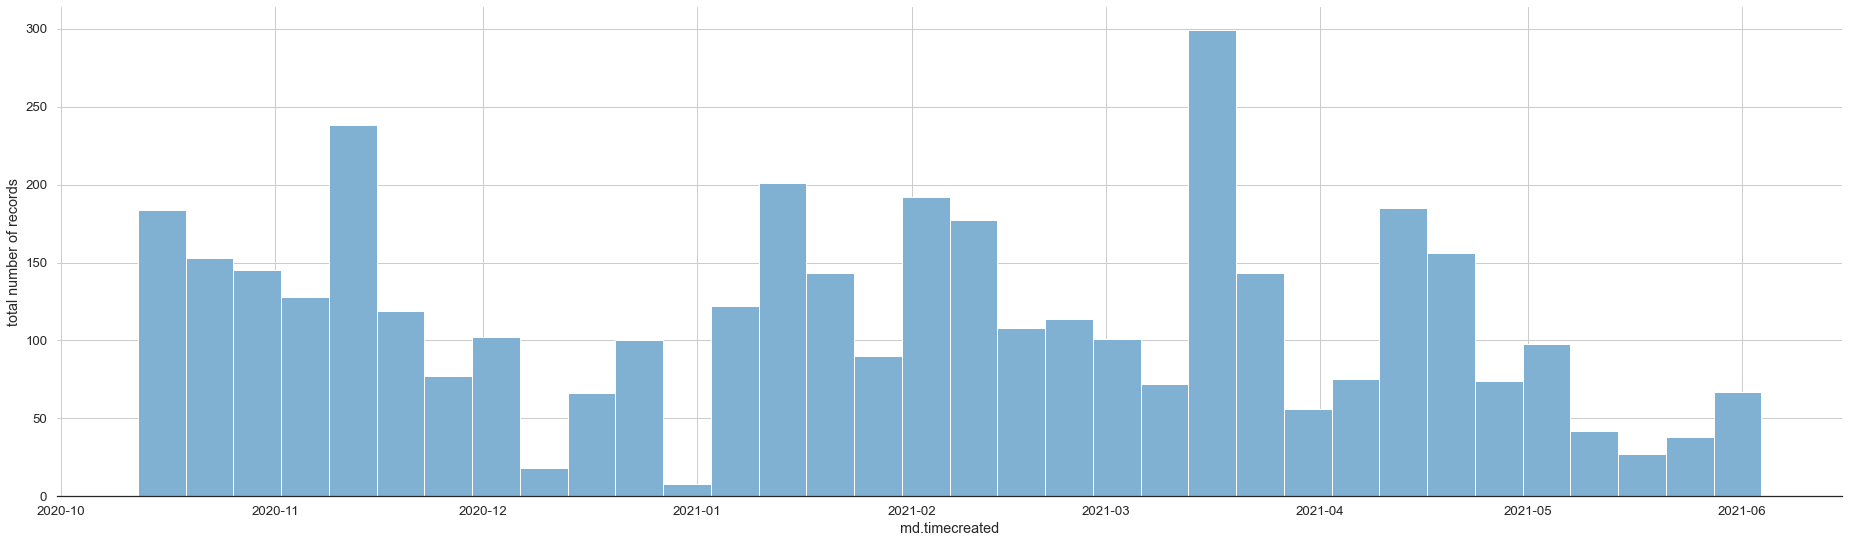

In [133]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(32, 9)) # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge über 8 Monate (Gesamtzeitraum)
# chart = sns.histplot(data=md.timecreated, bins=8, color=colors_set3[4], alpha=1)

# Visualisierung der Menge der Log-Einträge über 34 Wochen (Gesamtzeitraum)
chart = sns.histplot(data=md.timecreated, bins=34, color=colors_set3[4], alpha=1)

# Visualisierung der Menge der Log-Einträge über 235 Tage (Gesamtzeitraum)
# chart = sns.histplot(data=md.timecreated, bins=235, color=colors_set3[4], alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='both')
chart.set_axisbelow(True)
chart.set_xlabel('md.timecreated')
chart.set_ylabel('total number of records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
#### Menge der Log-Einträge pro Tag

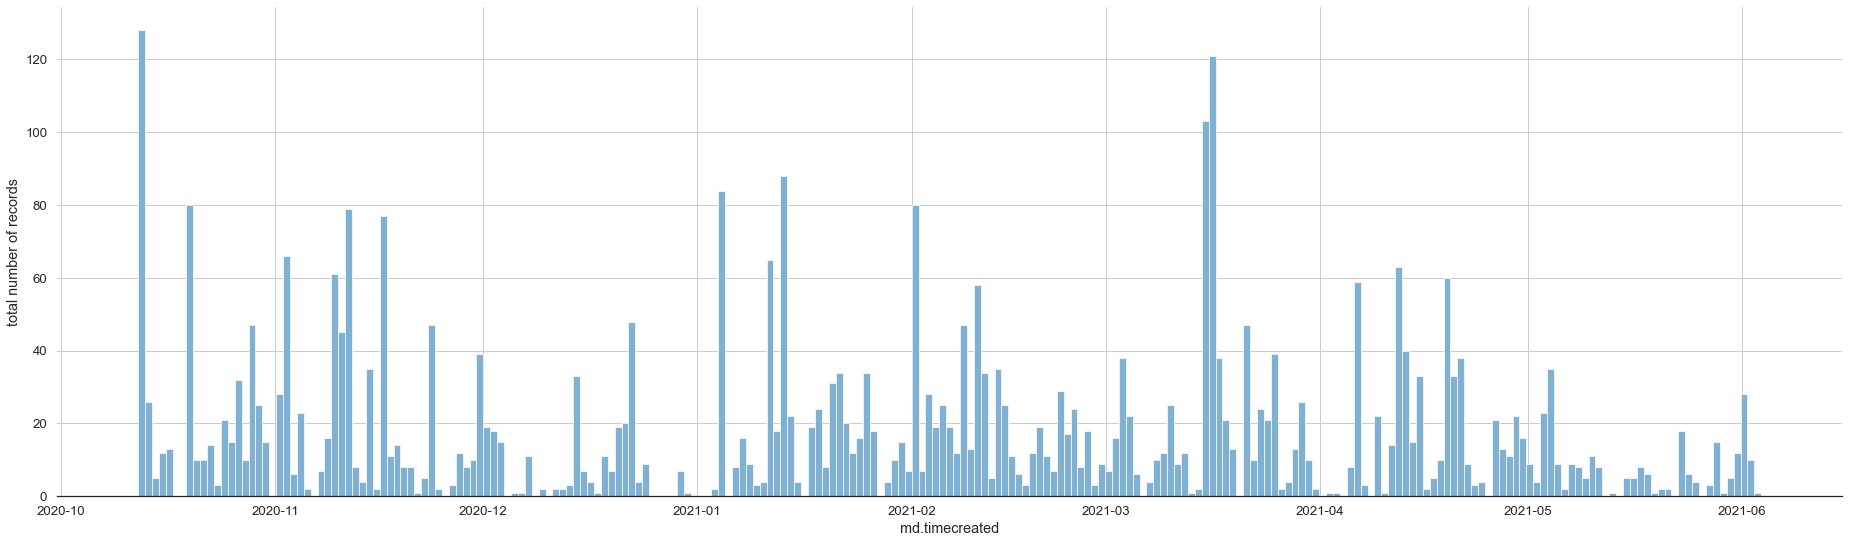

In [134]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(32, 9)) # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge über 8 Monate (Gesamtzeitraum)
# chart = sns.histplot(data=md.timecreated, bins=8, color=colors_set3[4], alpha=1)

# Visualisierung der Menge der Log-Einträge über 34 Wochen (Gesamtzeitraum)
# chart = sns.histplot(data=md.timecreated, bins=34, color=colors_set3[4], alpha=1)

# Visualisierung der Menge der Log-Einträge über 235 Tage (Gesamtzeitraum)
chart = sns.histplot(data=md.timecreated, bins=235, color=colors_set3[4], alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='both')
chart.set_axisbelow(True)
chart.set_xlabel('md.timecreated')
chart.set_ylabel('total number of records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
#### Menge der Log-Einträge pro Student

In [135]:
# Ermittlung der Menge der Log-Einträge pro Student
loggings_user = pd.Series(md.userid[md.userstatus == 'student'].groupby(md.userid).count(), name='loggings')
# display(loggings_user)

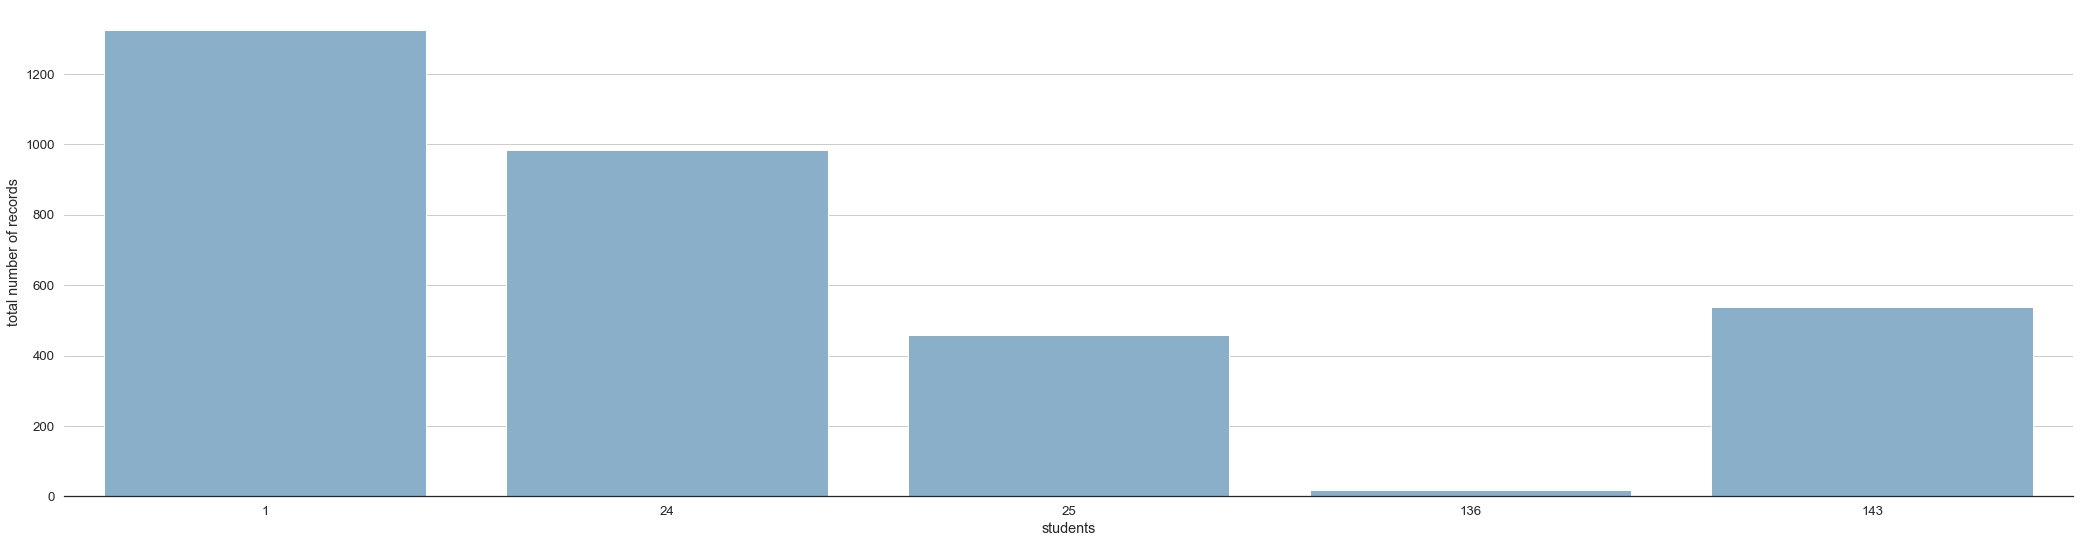

In [136]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(36, 9)) # Größe der Visualisierung (in inch)

# Visualisierung der absoluten Menge der Log-Einträge pro Student
chart = sns.barplot(x=loggings_user.index.astype(int), y=loggings_user, color=colors_set3[4])

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('students')
chart.set_ylabel('total number of records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/Analyse_der_Kontinuitaet_Log-Eintraege_pro_Student.pdf', format='pdf')
plt.show()

&nbsp;
#### Menge der Arbeitswochen pro Student

In [137]:
# Ermittlung der Menge der Arbeitswochen pro Student
weeks_user = pd.Series(md.year_week[md.userstatus == 'student'].groupby(md.userid).nunique(), name='weeks')
# display(weeks_user)

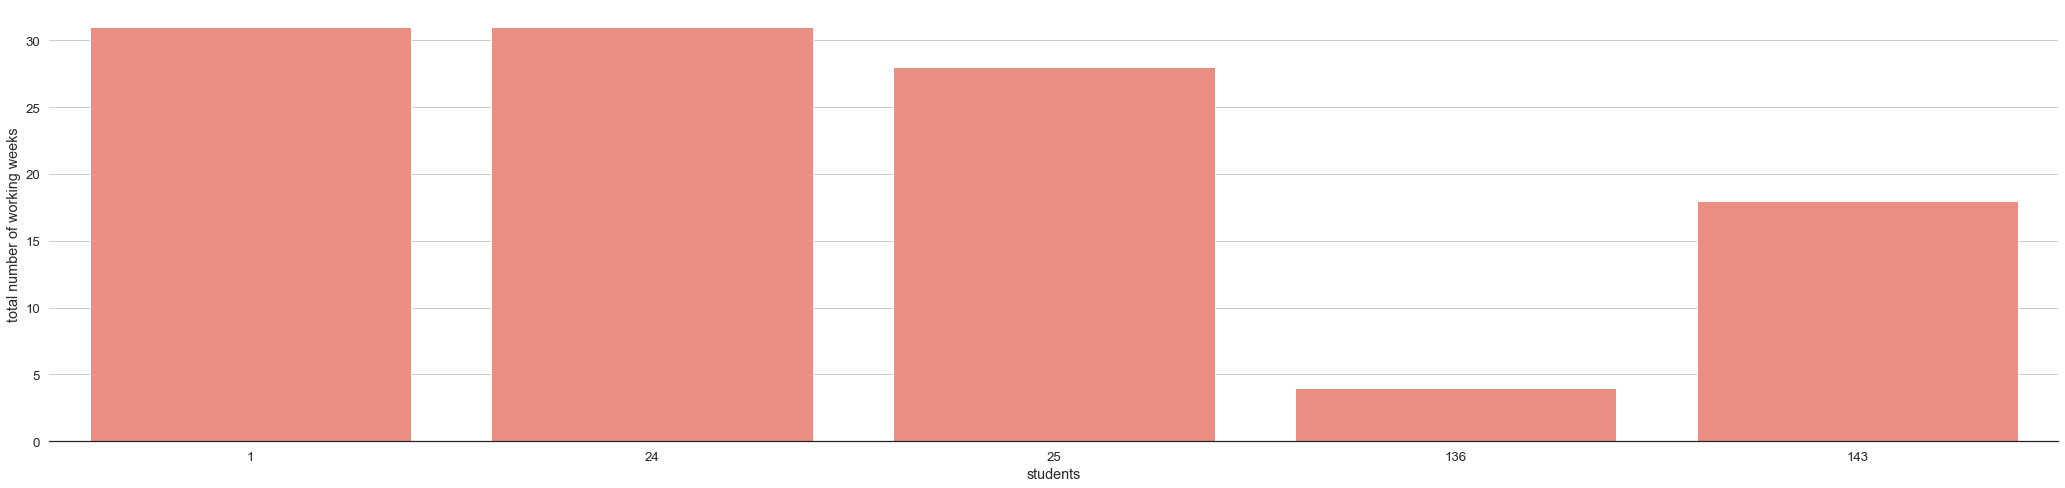

In [138]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(36, 8))  # Größe der Visualisierung (in inch)

# Visualisierung der absoluten Menge der Arbeitswochen pro Student
chart = sns.barplot(x=weeks_user.index.astype(int), y=weeks_user, color=colors_set3[3])

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_xlabel('students')
chart.set_ylabel('total number of working weeks')
sns.despine(left=True)
# plt.savefig('charts/Analyse_der_Kontinuitaet_Arbeitswochen_pro_Student.pdf', format='pdf')
plt.show()

&nbsp;
#### Menge der Arbeitstage pro Student

In [139]:
# Ermittlung der Menge der Arbeitstage pro Student
days_user = pd.Series(md.year_day[md.userstatus == 'student'].groupby(md.userid).nunique(), name='days')
# display(days_user)

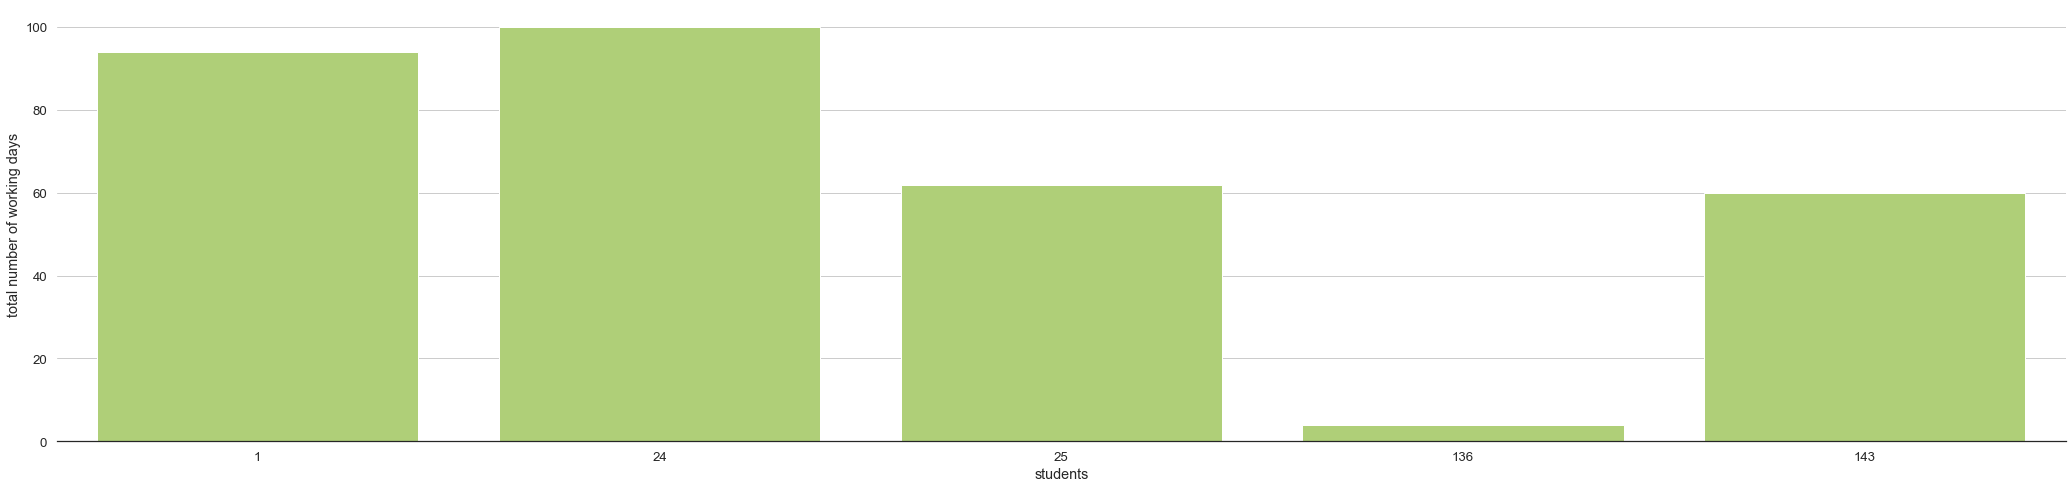

In [140]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(36, 8))  # Größe der Visualisierung (in inch)

# Visualisierung der absoluten Menge der Arbeitstage pro Student
chart = sns.barplot(x=days_user.index.astype(int), y=days_user, color=colors_set3[6])

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_xlabel('students')
chart.set_ylabel('total number of working days')
sns.despine(left=True)
# plt.savefig('charts/Analyse_der_Kontinuitaet_Arbeitstage_pro_Student.pdf', format='pdf')
plt.show()

&nbsp;
#### Ermittlung der Unterscheidungskriterien

&nbsp;
**Erstellung des neuen Datensets _time_relation_ zur Aufnahme individueller Kennziffern**

In [141]:
# Erstellung eines neuen Datensets, bestehend aus den absoluten Mengen der Log-Einträge, der Arbeitswochen und der Arbeitstage pro Student
time_relation = pd.concat([loggings_user, weeks_user, days_user], axis=1)

# Erstellung einer neuen Spalte zur Aufnahme der durchschnittlichen Mengen der Log-Einträge pro Arbeitswoche
time_relation['avg_count_per_week'] = 0
# Berechnung der Werte für die durchschnittlichen Mengen der Log-Einträge pro Arbeitswoche
time_relation.loc[(time_relation['avg_count_per_week'] == 0), ['avg_count_per_week']] = (loggings_user / weeks_user).astype(int)
# Erstellung einer neuen Spalte zur Aufnahme der unterdurchschnittlichen Mengen der Log-Einträge pro Arbeitswoche
time_relation['lower_count_per_week'] = 0
# Berechnung der Werte für die unterdurchschnittlichen Mengen der Log-Einträge pro Arbeitswoche
time_relation.loc[(time_relation['lower_count_per_week'] == 0), ['lower_count_per_week']] = ((loggings_user / weeks_user) * 0.5).astype(int)
# Erstellung einer neuen Spalte zur Aufnahme der überdurchschnittlichen Mengen der Log-Einträge pro Arbeitswoche
time_relation['upper_count_per_week'] = 0
# Berechnung der Werte für die überdurchschnittlichen Mengen der Log-Einträge pro Arbeitswoche
time_relation.loc[(time_relation['upper_count_per_week'] == 0), ['upper_count_per_week']] = ((loggings_user / weeks_user) * 1.5).astype(int)

# Erstellung einer neuen Spalte zur Aufnahme der durchschnittlichen Mengen der Log-Einträge pro Arbeitstag
time_relation['avg_count_per_day'] = 0
# Berechnung der Werte für die durchschnittlichen Mengen der Log-Einträge pro Arbeitstag
time_relation.loc[(time_relation['avg_count_per_day'] == 0), ['avg_count_per_day']] = (loggings_user / days_user).astype(int)
# Erstellung einer neuen Spalte zur Aufnahme der unterdurchschnittlichen Mengen der Log-Einträge pro Arbeitstag
time_relation['lower_count_per_day'] = 0
# Berechnung der Werte für die unterdurchschnittlichen Mengen der Log-Einträge pro Arbeitstag
time_relation.loc[(time_relation['lower_count_per_day'] == 0), ['lower_count_per_day']] = ((loggings_user / days_user) * 0.5).astype(int)
# Erstellung einer neuen Spalte zur Aufnahme der überdurchschnittlichen Mengen der Log-Einträge pro Arbeitstag
time_relation['upper_count_per_day'] = 0
# Berechnung der Werte für die überdurchschnittlichen Mengen der Log-Einträge pro Arbeitstag
time_relation.loc[(time_relation['upper_count_per_day'] == 0), ['upper_count_per_day']] = ((loggings_user / days_user) * 1.5).astype(int)

time_relation.reset_index(inplace=True)
display(time_relation)

userid  loggings  weeks  days  avg_count_per_week  lower_count_per_week  \
0       1      1324     31    94                  42                    21   
1      24       983     31   100                  31                    15   
2      25       457     28    62                  16                     8   
3     136        18      4     4                   4                     2   
4     143       538     18    60                  29                    14   

   upper_count_per_week  avg_count_per_day  lower_count_per_day  \
0                    64                 14                    7   
1                    47                  9                    4   
2                    24                  7                    3   
3                     6                  4                    2   
4                    44                  8                    4   

   upper_count_per_day  
0                   21  
1                   14  
2                   11  
3                    6  
4                   13

&nbsp;
**Ausgabe der durchschnittlichen Mengen an Log-Einträgen pro Arbeitswoche und Student**

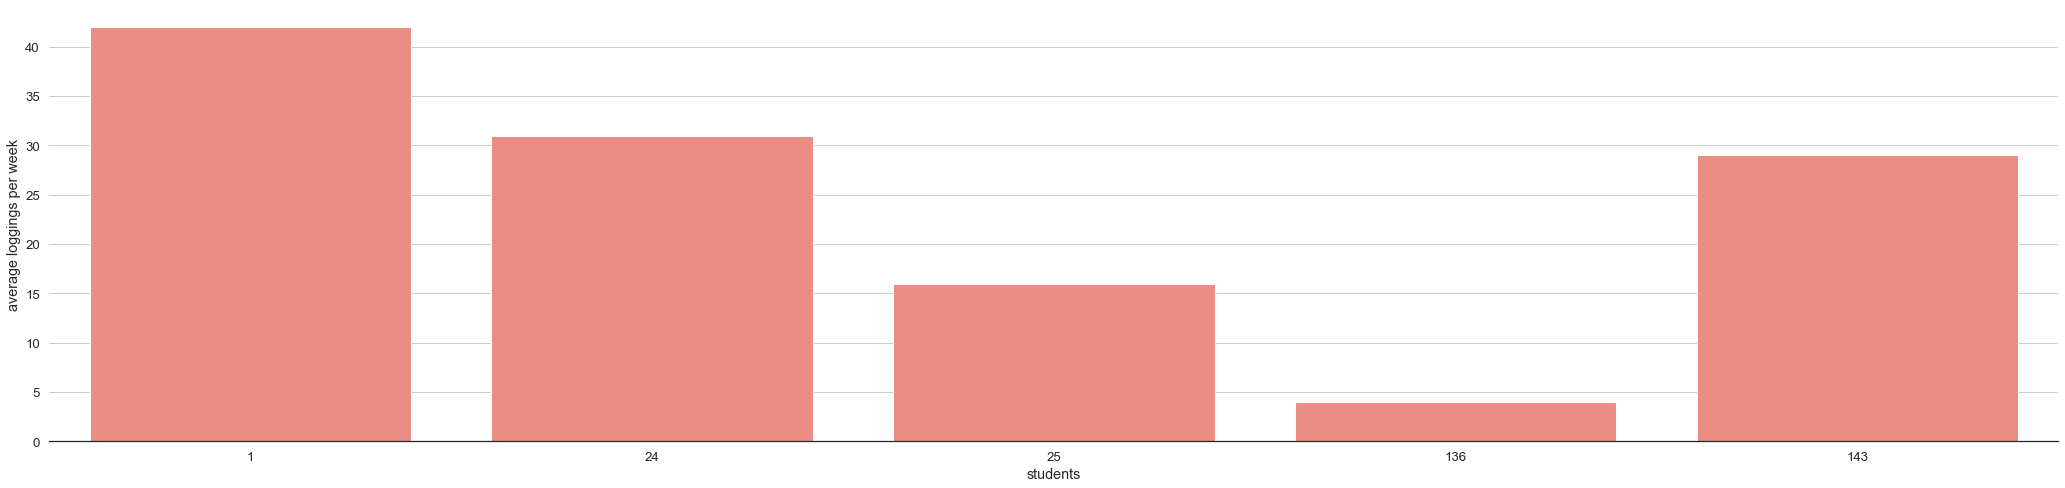

In [142]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(36, 8))  # Größe der Visualisierung (in inch)

# Visualisierung der durchschnittlichen Mengen an Log-Einträgen pro Arbeitswoche und Student
chart = sns.barplot(x=time_relation.userid.astype(int), y=time_relation['avg_count_per_week'], color=colors_set3[3])

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_xlabel('students')
chart.set_ylabel('average loggings per week')
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Ausgabe der durchschnittlichen Mengen an Log-Einträgen pro Arbeitstag und Student**

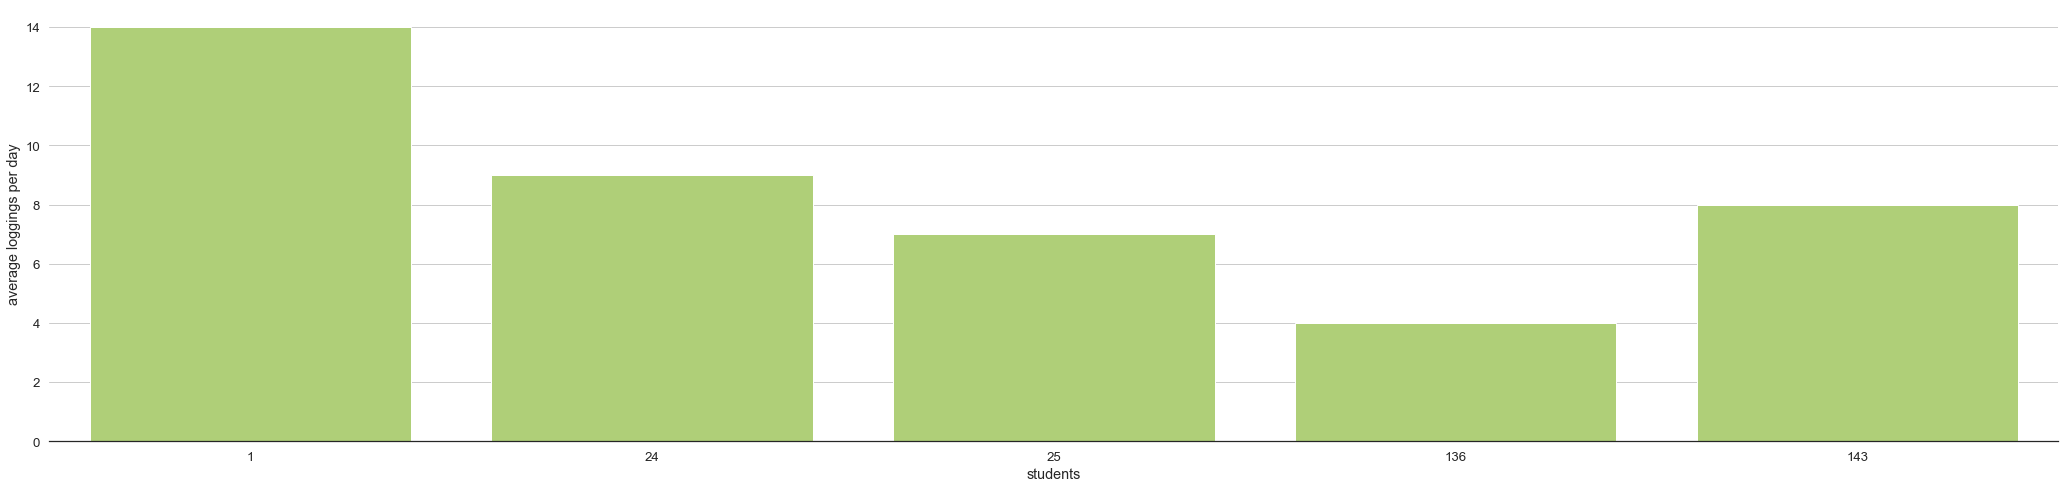

In [143]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(36, 8))  # Größe der Visualisierung (in inch)

# Visualisierung der durchschnittlichen Mengen an Log-Einträgen pro Arbeitstag und Student
chart = sns.barplot(x=time_relation.userid.astype(int), y=time_relation['avg_count_per_day'], color=colors_set3[6])

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_xlabel('students')
chart.set_ylabel('average loggings per day')
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Ermittlung der Mengen der Arbeitswochen innerhalb des Toleranzbereichs pro Student**

In [144]:
# Deklaration eines leeren Listen-Objekts zur Aufnahme der ermittelten Wochen pro Student
list_weeks = list()

# Funktion zur Ermittlung der Menge der Arbeitswochen, in denen die Menge der Log-Einträge pro Arbeitswoche innerhalb des Toleranzbereichs lag
def get_weeks_in_range(i, list_weeks):
    count = 0
    for row in md.year_week[md.userid == time_relation.iloc[i]['userid']].groupby(md.year_week).count():
        if row > time_relation.iloc[i]['lower_count_per_week'] & row < time_relation.iloc[i]['upper_count_per_week']:
            count += 1
    list_weeks.append(count)

# Schleife zur Steuerung der Ermittlungsfunktion
for i in time_relation.index:
    get_weeks_in_range(i, list_weeks)

# Erstellung eines DataFrame-kompatiblen Series-Objekts
weeks_in_range = pd.Series(list_weeks, name='weeks_in_range', dtype='int32')

# Ausgabe des Ergebnisses
# display(weeks_in_range)

&nbsp;
**Ermittlung der Mengen der Arbeitstage innerhalb des Toleranzbereichs pro Student**

In [145]:
# Deklaration eines leeren Listen-Objekts zur Aufnahme der ermittelten Tage pro Student
list_days = list()

# Funktion zur Ermittlung der Menge der Arbeitstage, an denen die Menge der Log-Einträge pro Arbeitstag innerhalb des Toleranzbereichs lag
def get_days_in_range(i, list_days):
    count = 0
    for row in md.year_day[md.userid == time_relation.iloc[i]['userid']].groupby(md.year_day).count():
        if row > time_relation.iloc[i]['lower_count_per_day'] & row < time_relation.iloc[i]['upper_count_per_day']:
            count += 1
    list_days.append(count)

# Schleife zur Steuerung der Ermittlungsfunktion
for i in time_relation.index:
    get_days_in_range(i, list_days)

# Erstellung eines DataFrame-kompatiblen Series-Objekts
days_in_range = pd.Series(list_days, name='days_in_range', dtype='int32')

# Ausgabe des Ergebnisses
# display(days_in_range)

&nbsp;
**Ergänzung der Mengen an Arbeitswochen und -tagen innerhalb des Toleranzbereichs**

In [146]:
# Ergänzung des Datensets mit den Mengen an Arbeitswochen und -tagen, die innerhalb des individuellen Toleranzbereichs lagen.
time_relation = pd.concat([time_relation, weeks_in_range, days_in_range], axis=1)
display(time_relation)

userid  loggings  weeks  days  avg_count_per_week  lower_count_per_week  \
0       1      1324     31    94                  42                    21   
1      24       983     31   100                  31                    15   
2      25       457     28    62                  16                     8   
3     136        18      4     4                   4                     2   
4     143       538     18    60                  29                    14   

   upper_count_per_week  avg_count_per_day  lower_count_per_day  \
0                    64                 14                    7   
1                    47                  9                    4   
2                    24                  7                    3   
3                     6                  4                    2   
4                    44                  8                    4   

   upper_count_per_day  weeks_in_range  days_in_range  
0                   21              28             48  
1                   14              22             92  
2                   11              28             35  
3                    6               4              4  
4                   13              16             56

&nbsp;
**Ergänzung des individuellen Kontinuitaetskoeffizienten (IKK)**

In [147]:
# Ergänzung des individuellen Kontinuitaetskoeffizienten (IKK) im Datenset time_relation
time_relation['ikk'] = 0
time_relation.loc[(time_relation['ikk'] == 0), ['ikk']] = ((time_relation.weeks_in_range / weeks_in_period_count) * (time_relation.days_in_range / days_in_period_count))
display(time_relation)

userid  loggings  weeks  days  avg_count_per_week  lower_count_per_week  \
0       1      1324     31    94                  42                    21   
1      24       983     31   100                  31                    15   
2      25       457     28    62                  16                     8   
3     136        18      4     4                   4                     2   
4     143       538     18    60                  29                    14   

   upper_count_per_week  avg_count_per_day  lower_count_per_day  \
0                    64                 14                    7   
1                    47                  9                    4   
2                    24                  7                    3   
3                     6                  4                    2   
4                    44                  8                    4   

   upper_count_per_day  weeks_in_range  days_in_range       ikk  
0                   21              28             48  0.163404  
1                   14              22             92  0.246079  
2                   11              28             35  0.119149  
3                    6               4              4  0.001945  
4                   13              16             56  0.108936

&nbsp;
**Typisierung der Studenten nach Kontinuität ihrer Aktivitäten**

In [148]:
# Erstellung einer neuen Spalte zur Typisierung
time_relation['continuity'] = 'standard'
# Einordnung der Studenten nach der Kontinuität ihrer Aktivitäten
time_relation.loc[(time_relation['ikk'] > 0.6), ['continuity']] = 'high'
time_relation.loc[(time_relation['ikk'] < 0.3), ['continuity']] = 'low'
display(time_relation)

userid  loggings  weeks  days  avg_count_per_week  lower_count_per_week  \
0       1      1324     31    94                  42                    21   
1      24       983     31   100                  31                    15   
2      25       457     28    62                  16                     8   
3     136        18      4     4                   4                     2   
4     143       538     18    60                  29                    14   

   upper_count_per_week  avg_count_per_day  lower_count_per_day  \
0                    64                 14                    7   
1                    47                  9                    4   
2                    24                  7                    3   
3                     6                  4                    2   
4                    44                  8                    4   

   upper_count_per_day  weeks_in_range  days_in_range       ikk continuity  
0                   21              28             48  0.163404        low  
1                   14              22             92  0.246079        low  
2                   11              28             35  0.119149        low  
3                    6               4              4  0.001945        low  
4                   13              16             56  0.108936        low

&nbsp;
#### Anwendung der Unterscheidungskriterien

&nbsp;
**Typisierung der Studenten nach IKK**

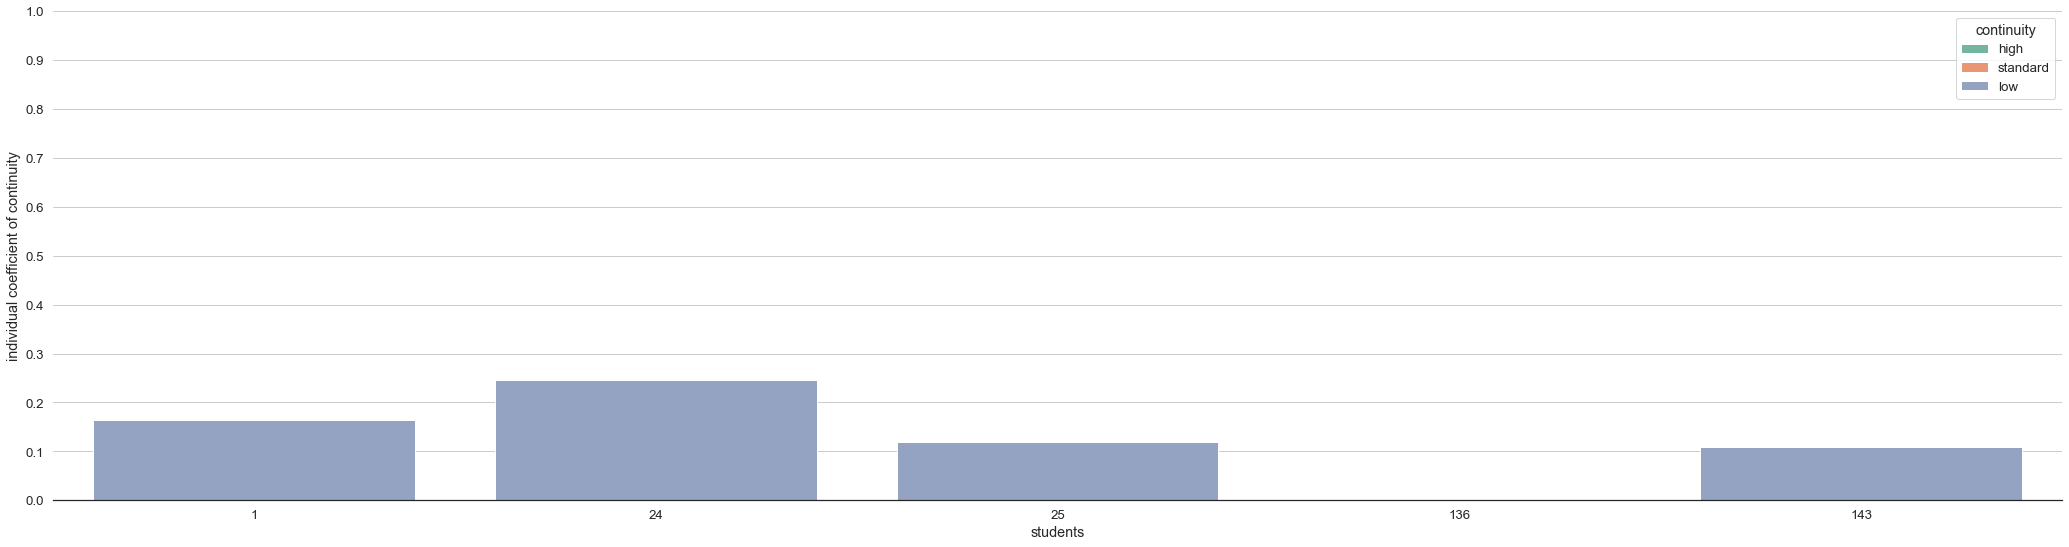

In [149]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(36, 9)) # Größe der Visualisierung (in inch)

# Visualisierung der Typisierung der Studenten nach individuellem Kontinuitätskoeffizienten
chart = sns.barplot(x=time_relation.userid.astype(int), y=time_relation.ikk, hue=time_relation.continuity, hue_order=['high', 'standard', 'low'], dodge=False, palette='Set2')

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.yaxis.set_ticks(np.arange(0, 1.1, step=0.1))
chart.set_xlabel('students')
chart.set_ylabel('individual coefficient of continuity')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
plt.legend(title='continuity', loc='upper right')
# plt.savefig('charts/Typisierung_nach_Kontinuitaet_IKK.pdf', format='pdf')
plt.show()

&nbsp;
**Typisierung der Studenten nach IKK mit Bezug auf die absolute Menge der Log-Einträge pro Student**

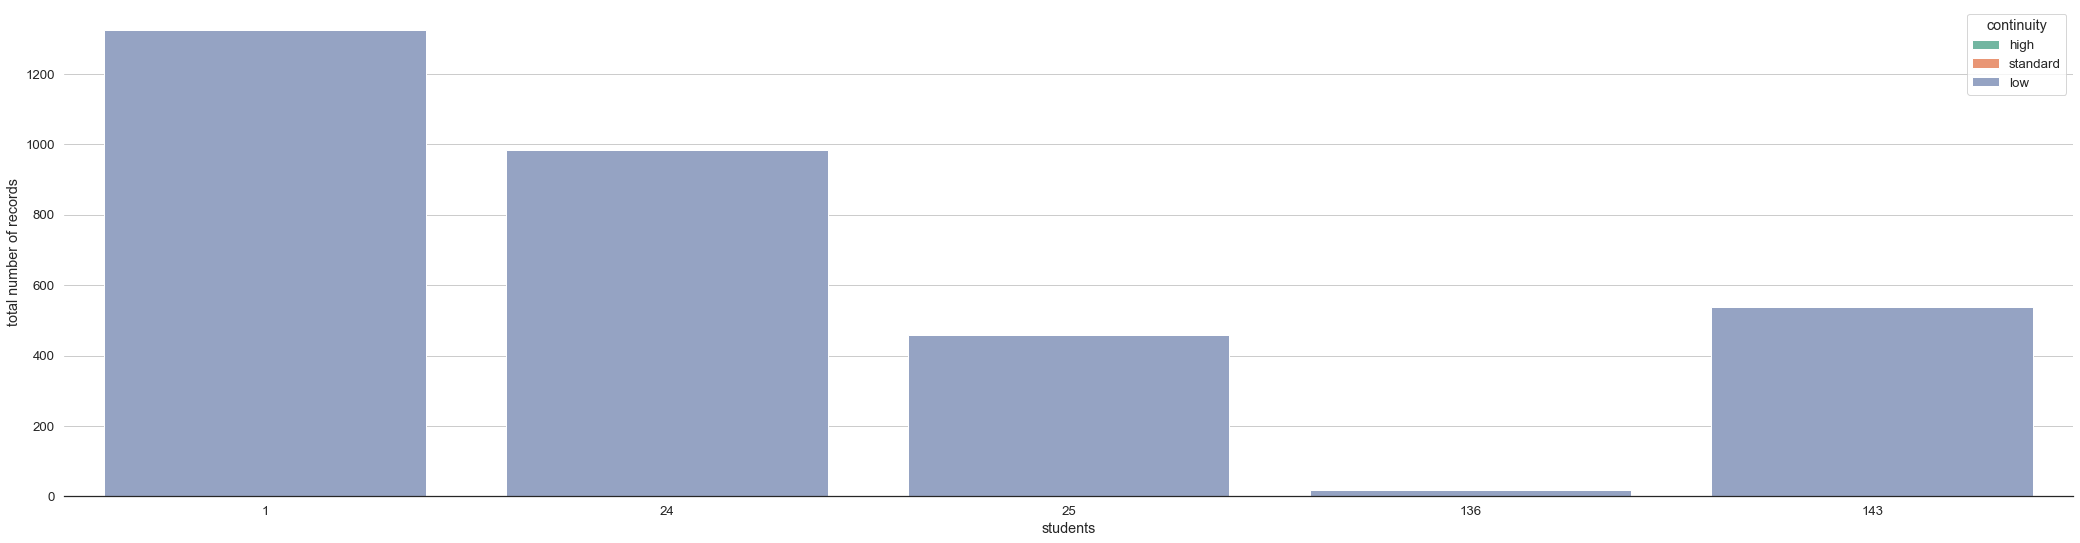

In [150]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(36, 9)) # Größe der Visualisierung (in inch)

# Visualisierung der Typisierung der Studenten nach IKK mit Bezug auf die absolute Menge der Log-Einträge pro Student
chart = sns.barplot(x=time_relation.userid.astype(int), y=time_relation.loggings, hue=time_relation.continuity, hue_order=['high', 'standard', 'low'], dodge=False, palette='Set2')

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('students')
chart.set_ylabel('total number of records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
plt.legend(title='continuity', loc='upper right')
# plt.savefig('charts/Typisierung_nach_Kontinuitaet_Log-Eintraege.pdf', format='pdf')
plt.show()

**Verteilung der Log-Einträge pro Student im Gesamtzeitraum nach Tagen**

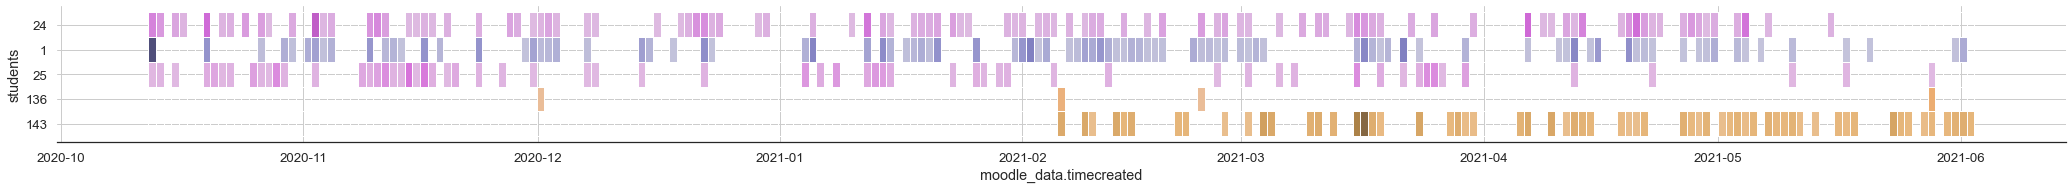

In [151]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(36, (time_relation.userid.unique().size / 2))) # Größe der Visualisierung (in inch)

# Visualisierung der Verteilung der Log-Einträge pro Student über 235 Tage (Gesamtzeitraum)
chart = sns.histplot(x=md.timecreated, y=md.userid[md.userstatus == 'student'].astype(str), bins=235, hue=md.userid, hue_order=np.sort(md.userid.unique()), palette='rocket', edgecolor='white', legend=False)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='both')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.timecreated')
chart.set_ylabel('students')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/Evaluierung_der_Kontinuitaet_Log-Eintraege_nach_Tagen.pdf', format='pdf')
plt.show()